In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix

In [20]:
df_smoke=pd.read_csv('/workspaces/codespaces-blank/Proyecto_DS/datasets/raw/smoke_detection_iot.csv')

df_smoke = df_smoke.drop('Unnamed: 0', axis='columns')
#df_smoke.index = df_smoke['CNT']
df_smoke = df_smoke.drop('CNT', axis='columns')

from datetime import datetime

df_smoke['UTC'] = pd.to_datetime(df_smoke['UTC'], unit='s')
df_smoke.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [21]:
df_smoke.shape

(62630, 14)

In [22]:
df_smoke.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [23]:
df_smoke['Day']=df_smoke['UTC'].dt.day
df_smoke['Month']=df_smoke['UTC'].dt.month
df_smoke['Year']=df_smoke['UTC'].dt.year 
df_smoke= df_smoke.drop(columns=['UTC'])
df_smoke.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Day,Month,Year
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,9,6,2022
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0,9,6,2022
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0,9,6,2022
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0,9,6,2022
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0,9,6,2022


Queremos ver qué tipo de distribución siguen los datos, ya que algunos métodos solo son válidos cuando los datos siguen una distribución normal.

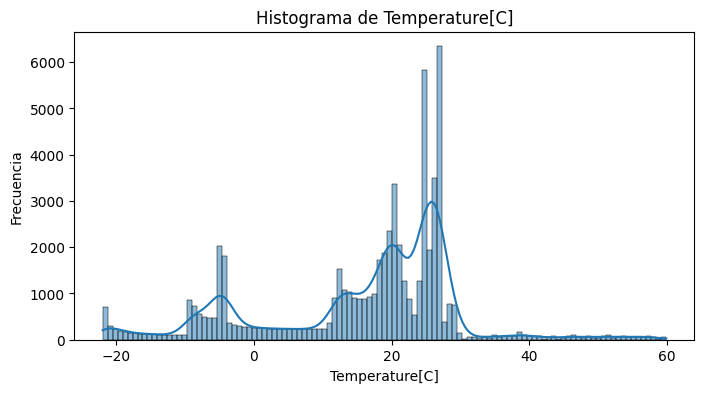

Temperature[C] no sigue una distribución normal


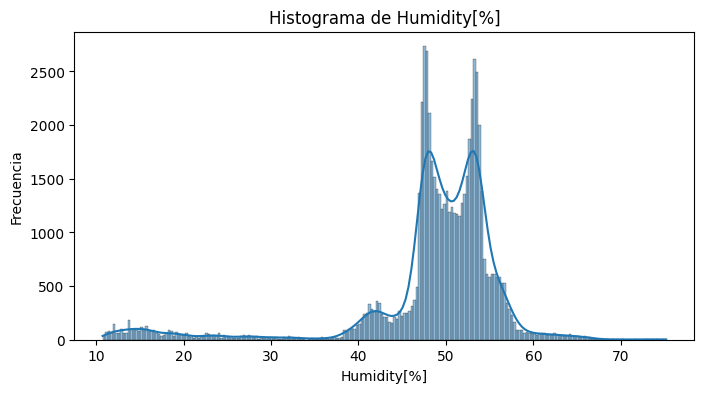

Humidity[%] no sigue una distribución normal


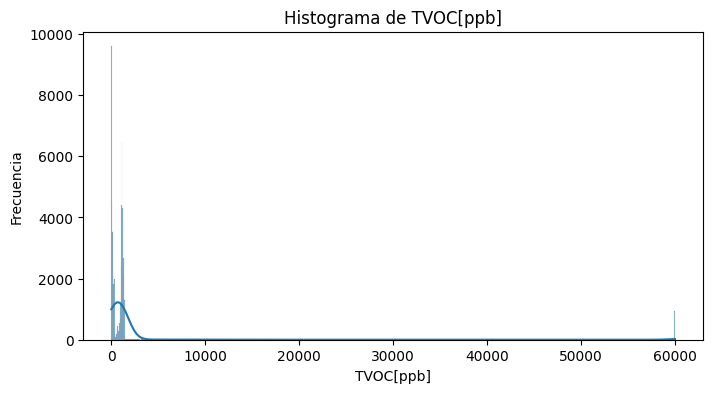

TVOC[ppb] no sigue una distribución normal


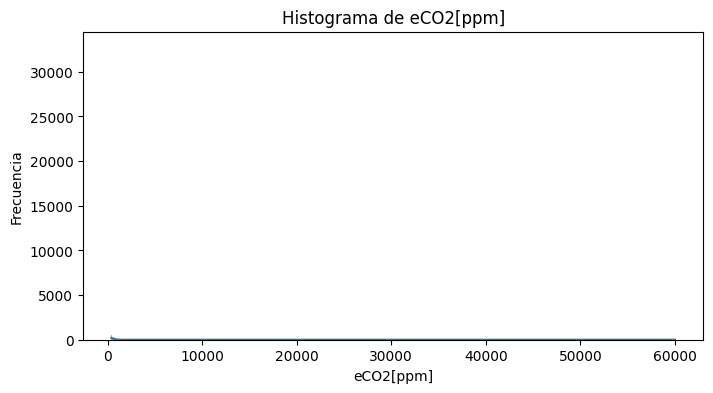

eCO2[ppm] no sigue una distribución normal


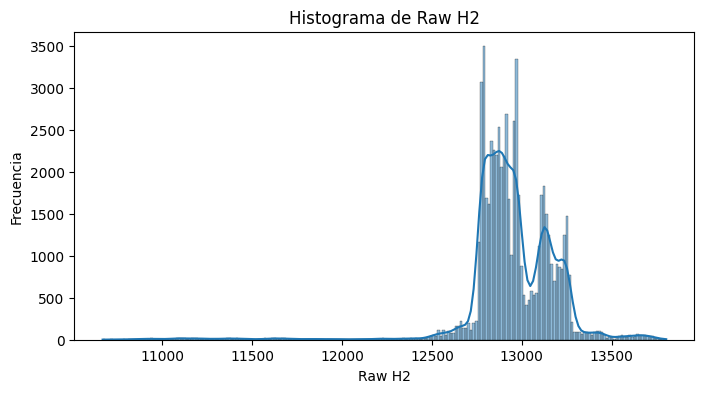

Raw H2 no sigue una distribución normal


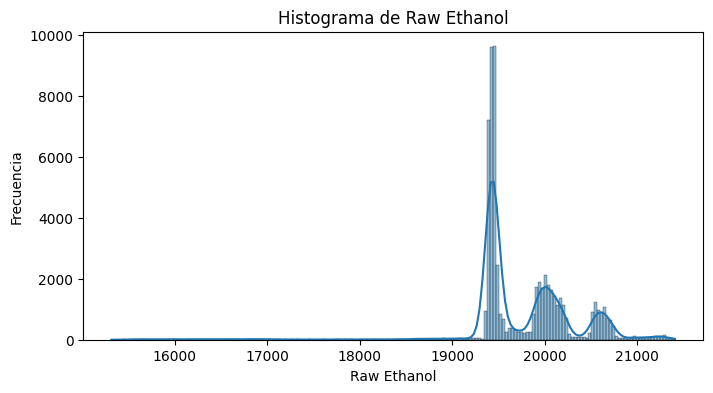

Raw Ethanol no sigue una distribución normal


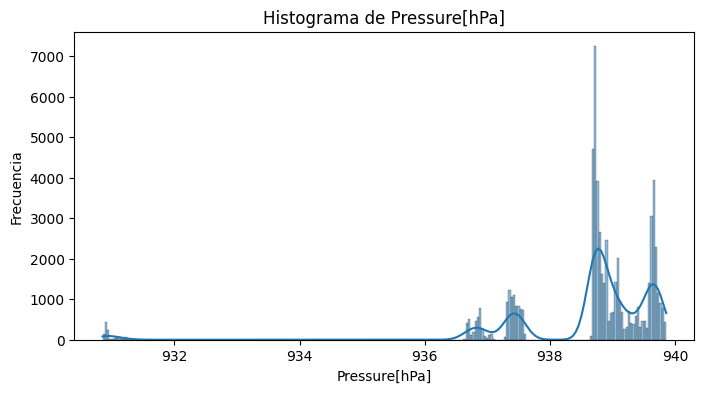

Pressure[hPa] no sigue una distribución normal


In [24]:
columnas = df_smoke.columns

#Aclaración, saco estas variables porque no me para de crushear el Kernel si no.
for columna in columnas:
    if columna not in ['PM1.0', 'PM2.5','NC0.5','NC1.0', 'NC2.5', 'Fire Alarm','Day', 'Year', 'Month']:   
        plt.figure(figsize=(8, 4))
        
        
        sns.histplot(df_smoke[columna], kde=True)
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.title('Histograma de {}'.format(columna))
        plt.show()
        
        
        _, p_value = stats.normaltest(df_smoke[columna])
        if p_value < 0.05:
            print('{} no sigue una distribución normal'.format(columna))
        else:
            print('{} sigue una distribución normal'.format(columna))

Normalizar los parámetros.

In [25]:
# Power transformer
from sklearn.preprocessing import PowerTransformer 
pw = PowerTransformer(method='yeo-johnson')
columnas = df_smoke.columns
df_smoke_normalizado = pd.DataFrame()

for columna in columnas:
    columna_normalizada = pw.fit_transform(df_smoke[[columna]])
    df_smoke_normalizado[columna] = columna_normalizada.flatten()

df_smoke_normalizado

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3252: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/home/codespace/.local/lib/python3.10/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/codespace/.local/lib/python3.10/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Day,Month,Year
0,0.236704,1.516414,-2.344151,-6.397660e-14,-2.212792,-1.919565,0.926477,-3.111033,-3.169175,-4.345601,-3.191453,-1.492901,-1.582456,-0.009506,-2.220446e-16,9.094947e-13
1,0.237871,1.350983,-2.344151,-6.397660e-14,-2.115901,-1.754126,0.934551,-3.111033,-3.169175,-4.345601,-3.191453,-1.492901,-1.582456,-0.009506,-2.220446e-16,9.094947e-13
2,0.238960,1.185816,-2.344151,-6.397660e-14,-2.041592,-1.606251,0.929168,-3.111033,-3.169175,-4.345601,-3.191453,-1.492901,-1.582456,-0.009506,-2.220446e-16,9.094947e-13
3,0.240127,1.032353,-2.344151,-6.397660e-14,-1.999747,-1.491780,0.927374,-3.111033,-3.169175,-4.345601,-3.191453,-1.492901,-1.582456,-0.009506,-2.220446e-16,9.094947e-13
4,0.241294,0.902882,-2.344151,-6.397660e-14,-1.965299,-1.392595,0.934551,-3.111033,-3.169175,-4.345601,-3.191453,-1.492901,-1.582456,-0.009506,-2.220446e-16,9.094947e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,0.115607,-2.504701,0.197462,-6.397660e-14,4.645638,1.520062,-1.606086,-1.204329,-1.225713,-0.979618,-1.221947,-0.929271,-1.582456,2.233186,-2.220446e-16,9.094947e-13
62626,0.132223,-2.503815,0.185831,-6.397660e-14,4.712281,1.561817,-1.600010,-1.244919,-1.265502,-1.021001,-1.262505,-0.929271,-1.582456,2.233186,-2.220446e-16,9.094947e-13
62627,0.148779,-2.504148,0.199232,-6.397660e-14,4.662258,1.548609,-1.593171,-1.328726,-1.326756,-1.092255,-1.332061,-0.965118,-1.582456,2.233186,-2.220446e-16,9.094947e-13
62628,0.165506,-2.501899,0.208881,-6.397660e-14,4.554712,1.513488,-1.598490,-1.328726,-1.347608,-1.101867,-1.344240,-0.965118,-1.582456,2.233186,-2.220446e-16,9.094947e-13


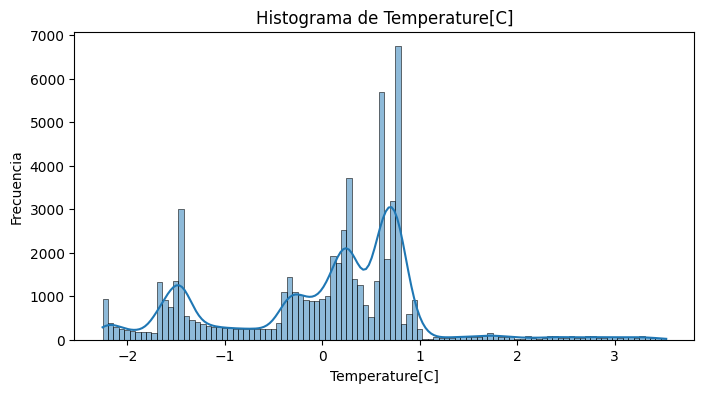

Temperature[C] no sigue una distribución normal


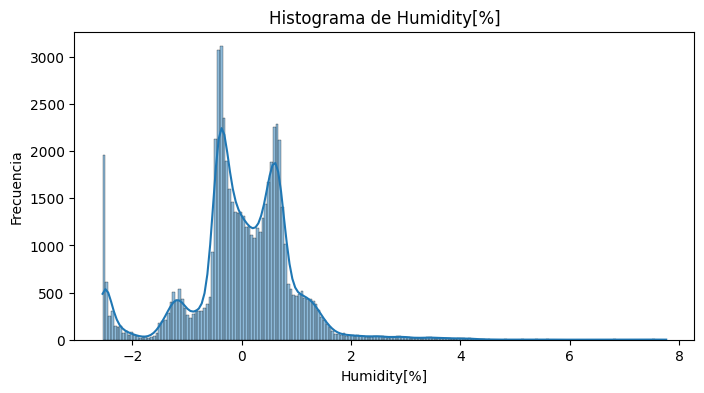

Humidity[%] no sigue una distribución normal


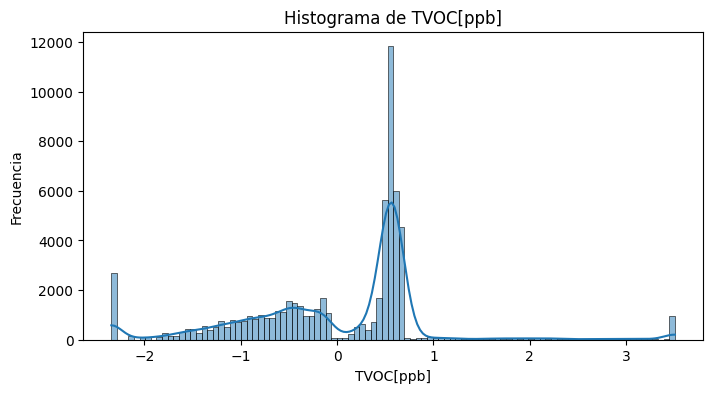

TVOC[ppb] no sigue una distribución normal


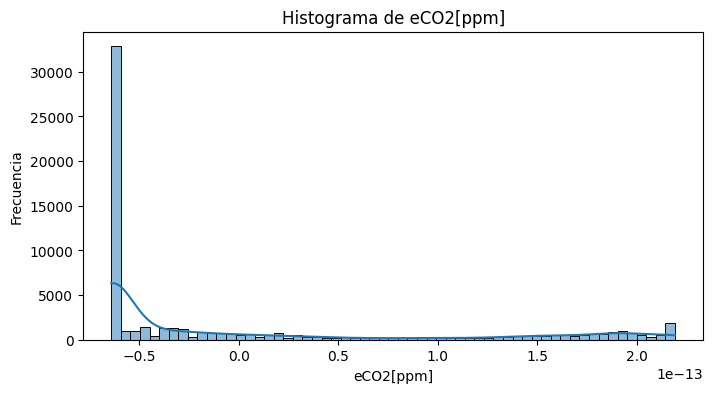

eCO2[ppm] no sigue una distribución normal


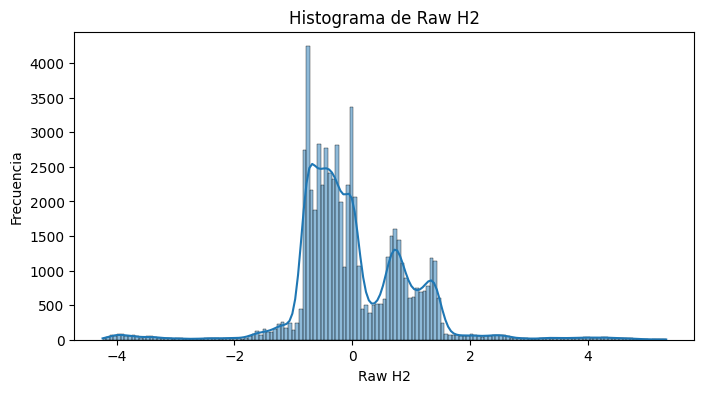

Raw H2 no sigue una distribución normal


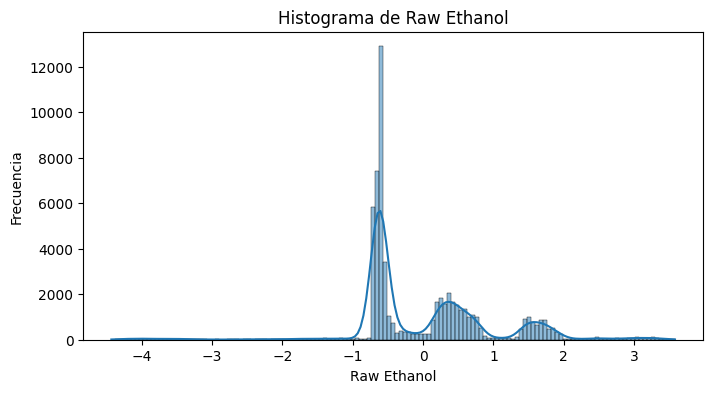

Raw Ethanol no sigue una distribución normal


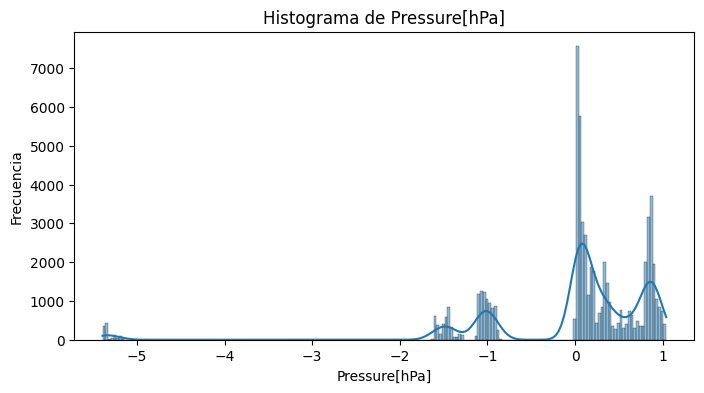

Pressure[hPa] no sigue una distribución normal


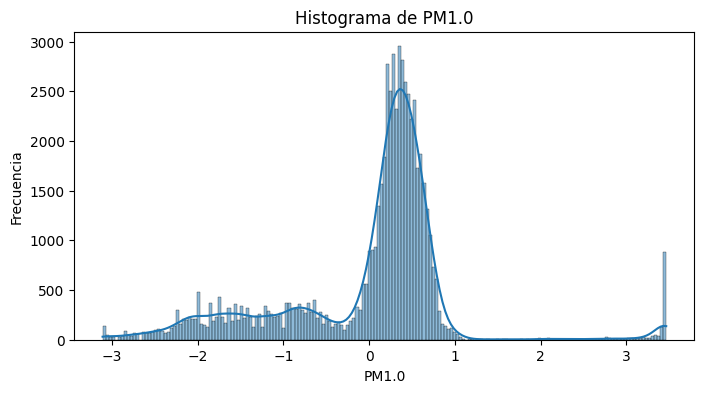

PM1.0 no sigue una distribución normal


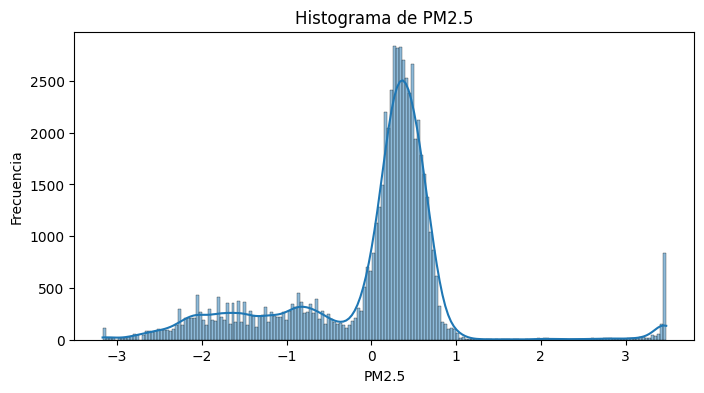

PM2.5 no sigue una distribución normal


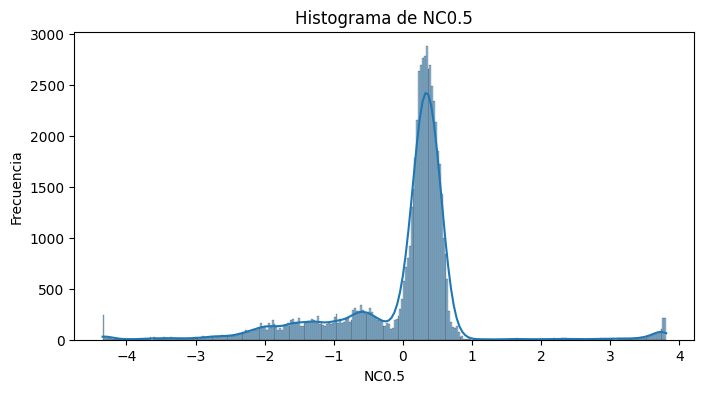

NC0.5 no sigue una distribución normal


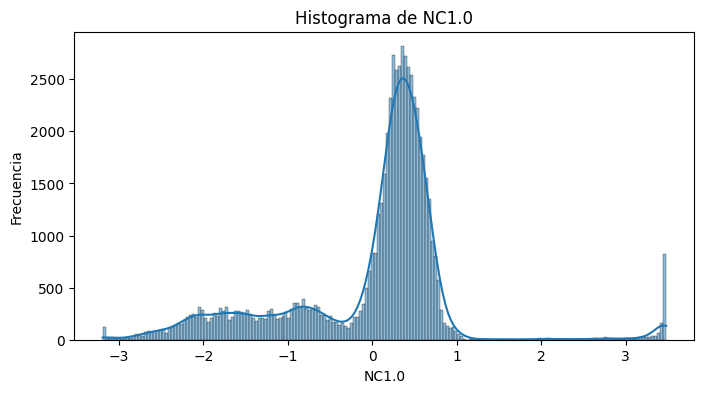

NC1.0 no sigue una distribución normal


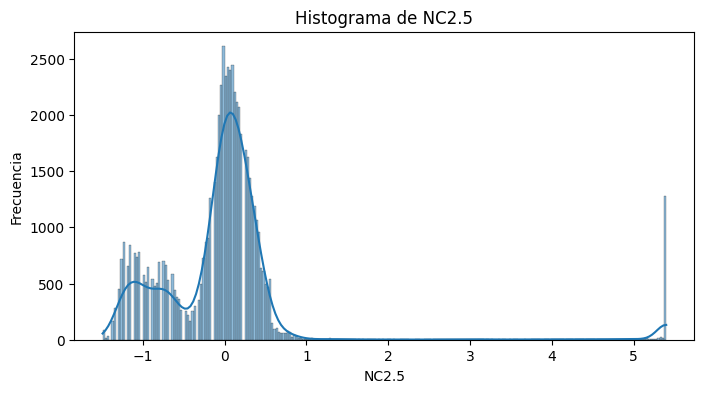

NC2.5 no sigue una distribución normal


In [26]:
columnas = df_smoke.columns

#Aclaración, saco estas variables porque no me para de crushear el Kernel si no.
for columna in columnas:
    if columna not in ['Fire Alarm','Day', 'Year', 'Month']:   
        plt.figure(figsize=(8, 4))
        
        
        sns.histplot(df_smoke_normalizado[columna], kde=True)
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.title('Histograma de {}'.format(columna))
        plt.show()
        
        
        _, p_value = stats.normaltest(df_smoke_normalizado[columna])
        if p_value < 0.05:
            print('{} no sigue una distribución normal'.format(columna))
        else:
            print('{} sigue una distribución normal'.format(columna))

Por más de que aplique la transformación Yeo-Johnson de PowerTransformer, los datos siguen teniendo distribución no normal. Igualmente me voy a quedar con este data frame ya que estan los datos mas balanceados, en el sentido que estan dentro del mismo rango (excepto el eCO2ppm).

## Outliers y entrenamiento

Como estamos trabajando con un detector de humos, el tratamiento de outliers puede ser tricky, ya que la presencia de éstos puede deberse a la existencia de un incendio. Lo primero que haremos para esto, es ver si existe una relación entre la presencia de outliers y que la alarma suene o no. Para ello vamos a identificar los outliers con diferentes técnicas.

In [27]:
df_smoke_normalizado.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
Day               0
Month             0
Year              0
dtype: int64

Tengo muchos nulos en 'eCO2[ppm]' (ahora no me marca ninguno, antes me marcaba mas de 40000?????????)

In [28]:
#X=df_smoke_normalizado.drop('eCO2[ppm]', axis=1)
#X.isnull().sum()

Isolation Forest

In [29]:
X = df_smoke.drop("Fire Alarm", axis=1) 
y = df_smoke['Fire Alarm']               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import IsolationForest
# identificar outliers en el dataset de train
iso = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)
len(yhat[yhat==-1])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


5009

Mucha menor cantidad de outliers que con métodos IQR y etc usado en entregas anteriores. Ahora probemos los modelos.

In [43]:
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Identifica outliers en el dataset de entrenamiento
iso = IsolationForest(contamination=0.1)  # Proporción de outliers esperada
yhat = iso.fit_predict(X_train)

# Selecciona todas las filas que no son outliers
mask = yhat != -1  # Filtro
X_train_i = X_train[mask]
y_train_i = y_train[mask]

#ajusta modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_i, y_train_i)

yhat_i = model.predict(X_test)
mape=mean_absolute_percentage_error(y_test, yhat_i)
mae=mean_absolute_error(y_test, yhat_i)
medAE=median_absolute_error(y_test,yhat_i)

print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
print('medAE: %.3f' % medAE)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


MAE: 0.074
MAPE: 282958079733400.938
medAE: 0.000


El MAE es 0.074, lo cual es muy cercano a 0. Buen resultado del modelo, ya que MAE es el promedio de las diferencias entre las predicciones del modelo y los valores reales.

(muchos valores cambian a medida que corro los codigos de nuevo???)

Arboles de decisión

In [44]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
clf = DecisionTreeClassifier(random_state=1234,criterion='gini',max_depth=5)

model=clf.fit(X_train_i, y_train_i)

yhat_i = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat_i)
mape=mean_absolute_percentage_error(y_test, yhat_i)
medAE=median_absolute_error(y_test,yhat_i)

print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
print('medAE: %.3f' % medAE)


MAE: 0.020
MAPE: 1078620380178.168
medAE: 0.000


El MAE es 0.020, lo cual es muy cercano a 0. Buen resultado del modelo, ya que MAE es el promedio de las diferencias entre las predicciones del modelo y los valores reales. Da mejor que el logistic regression.

Bosques de decisión

In [45]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=30,criterion='gini')

model=clf.fit(X_train_i, y_train_i)

yhat_i = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat_i)
mape=mean_absolute_percentage_error(y_test, yhat_i)
medAE=median_absolute_error(y_test,yhat_i)

print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
print('medAE: %.3f' % medAE)

MAE: 0.020
MAPE: 1438160506904.218
medAE: 0.000


Hasta ahora este algoritmo es el que mejor anda.  (tercera vez que lo corro y ahora da igual al anterior???). Mape tiene el problema que cuando se divide por algo cercano a cero da numeros muy grandes.

Local Outlier Factor

In [34]:
#me mata el KERNEL! NO LO VOY A USAR

#from sklearn.neighbors import LocalOutlierFactor
# identicar outliers en train
#lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto',metric='minkowski')
#yhat = lof.fit_predict(X_train)
#len(yhat[yhat==-1])

One-Class SVM

In [35]:
#me mata el KERNEL! NO LO VOY A USAR

#from sklearn.svm import OneClassSVM
#ee = OneClassSVM(nu=0.1) # nu proporcion de outliers
#yhat = ee.fit_predict(X_train)
#len(yhat[yhat==-1])